# Introduction to Regressions, Perceptrons, and Support Vector Machines
Gina Nguyen
Machine Learning Basics

# Implementing a Linear Regression:
The following blocks of code will implement a squared loss function (and gradient descent) to train the model, test the model, and compare the solution from one achieved by sklearn's native linear regression function 



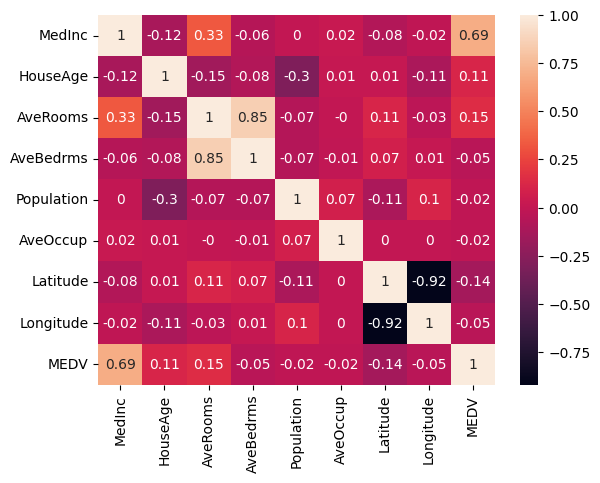

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

#Importing the California housing dataset from the sklearn and creating the dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
california = pd.DataFrame(housing.data, columns= housing.feature_names)
california['MEDV'] = housing.target
california.head()

#Viewing the data as a correlation matrix (just for funsies and allows me to check that data was loaded correctly)
correlation_matrix = california.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

#Splitting the dataset into a training and testing set
from sklearn.model_selection import train_test_split
X = california.to_numpy()
X = np.delete(X, 8, 1) #deletes the medv row
Y = california['MEDV'].to_numpy()
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state = 5)

## Training the solution by finding the linear regression equation:
A linear regression that gives a predicted y-value has the equation: 
$ y' = b + w_1x_1 + w_2x_2 + ... + w_mx_m $ similar to how a linear equation equals $ y=mx+b $

Because our features are in a matrix, this will be calculated as $ y_{predicted}= w^Tx+b $.


## Equations for this linear regression:
Because my computer is old and I am too afraid to have it go through too many iterations of a gradient descent, I am choosing to calculate the slope $w$ and setting the bias as 0. I will then use a Mean Square Error for my loss function. Note that if I was more confident in my computers ability to compute, I would choose $w$ and $b$ at random and have the gradient descent update its values.

Slope $w$: 
$ \ w = (X^TX)^{-1}X^Ty \ $ (from https://towardsdatascience.com/weighted-linear-regression-2ef23b12a6d7)

Mean Square Error (MSE): 
$ \ MSE = (1/n) * (\sum^{n}_{i=1} (y_i - \hat{y_i})^2) $

Given that the loss function is squared, we know that the function is convex and guaranteed to converge. The following gradient descent will make updates to the values of $w$ and $b$.
The equations for the gradient descent are the derivatives with respect to w and with respect to b. Equations for Mean Squared Error and its derivatives were given from (https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931).

$ {d/dw} = (-2/n)(y_{actual} - y_{predicted})(X_{actual}) $

$ {d/db} = (-2/n) \sum_{i=0}^{n} (y_{actual} - y_{predicted}) $

Lastly, we will use the final equation for $y_{predicted}$ to calculate the RMSE and R2 to compare how the "homemade" linear regression did compared to the linear regression done by sklearn. Also, apologies for having all of the code into one big block, I found that if I had them in separate blocks and ran them, I would get runtime overflow errors (since the code would be executed "out of order").

In [2]:
from numpy.linalg import inv

#Calculating the slope of the regression 
w = np.matmul(inv(np.matmul(np.transpose(X_train),X_train)), np.matmul(np.transpose(X_train),Y_train))
#Calculating the intercept
b = 0

#Finding the predicted y-value
y_predict = np.transpose(np.matmul(np.transpose(w), np.transpose(X_train))) + b

#Calculating the Loss Function
loss_func = np.power((y_predict-Y_train),2)
n = len(X_train) #finds the size of the function
mean_square_err = (1/n) * np.sum(loss_func) #uses the equation for mse

#Finding the gradient descent
L = .000001 #the learning rate
n = len(X_train) #the size of the data set  
for i in range (10):
    y_predict = np.transpose(np.matmul(np.transpose(w), np.transpose(X_train))) + b

    #the derivative with respect to w
    D_w = (-2/n) * np.matmul(np.transpose(X_train),np.transpose(Y_train-y_predict))
    #the derivative with respect to b
    D_b = (-2/n)*np.sum(Y_train - y_predict)
    
    # Updating the values of w and b 
    w = w - L*D_w
    b = b - L*D_b

#Calculating the RMSE and R2 for training and testing set
from sklearn.metrics import r2_score
def rmse(predictions, targets):
    return np.sqrt(((predictions-targets) ** 2).mean())

#Predictions:
Y_pred_train = np.transpose(np.matmul(np.transpose(w), np.transpose(X_train))) + b
Y_pred_test = np.transpose(np.matmul(np.transpose(w), np.transpose(X_test))) + b

#Seeing how the model does on the training set
rmse_train = rmse(Y_pred_train, Y_train)
r2_train = r2_score(Y_train, Y_pred_train)
print("Training RMSE = " + str(rmse_train))
print("Training R2 = " + str(r2_train))
#Seeing how the model does on the test set
rmse_test = rmse(Y_pred_test, Y_test)
r2_test = r2_score(Y_test, Y_pred_test)
print("Test RMSE = " + str(rmse_test))
print("Test R2 = " + str(r2_test))

Training RMSE = 0.7756352751110025
Training R2 = 0.5440303620596879
Test RMSE = 0.7853381195851509
Test R2 = 0.5529730411209226


In [3]:

#Training the solution with sklearn
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

#Seeing how the model does on the training set
from sklearn.metrics import r2_score
def rmse(predictions, targets):
        return np.sqrt(((predictions-targets) ** 2).mean())

y_pred_train = lin_model.predict(X_train)
rmse_train = rmse(y_pred_train, Y_train)
r2_train = r2_score(Y_train, y_pred_train)
print("Training RMSE = " + str(rmse_train))
print("Training R2 = " + str(r2_train))

#Seeing how the model does on the test set
y_pred_test = lin_model.predict(X_test)
rmse_test = rmse(y_pred_test, Y_test)
r2_test = r2_score(Y_test, y_pred_test)
print("Test RMSE = " + str(rmse_test))
print("Test R2 = " + str(r2_test))


Training RMSE = 0.7221082719887487
Training R2 = 0.6047922425924859
Test RMSE = 0.7323542382277768
Test R2 = 0.6112568432827665


#### Comparing the self-implemented linear regression and the sklearn regression:
Noticably, the linear regression that I implemented was less accurate than the one implemented by sklearn. While messing around with the code, I noticed that changing the learning rate (as well as the iterations), the starting weight, or the starting bias changed the RMSE and R2, but it couldn't be changed in meaningful way. My biggest suspicion for why my linear regression is the starting loss function. I used a means square error, but maybe implementing a root mean square error or mean absolute error would have resulted in a more accurate linear regression. Additionally, the features were not normalized, which may account for the low accuracy on both the self-implemented and sklearn linear regression.

# Implementing SVM and Perceptrons from Scratch
The following blocks of code will:
1. Implement a perceptron loss and hinge loss functions
2. Implement a subgradient descent algorithm and optmize the perceptron and hinge losses.
3. Compare the perceptron loss and hinge loss function.

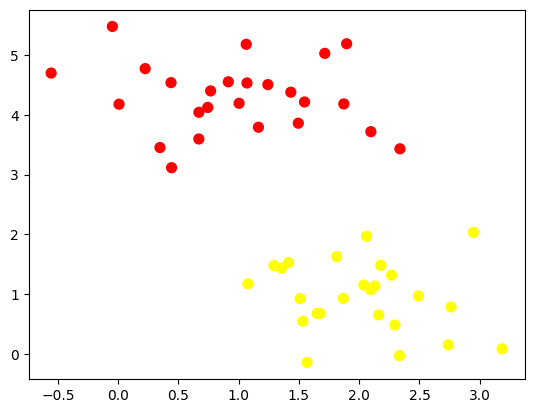

In [4]:
#Importing libraries
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

#Using the make_blobs function to create the data set
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn');

#Splitting the dataset into a training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 5) #the same train/test split as in the linear regression above

## Equations for Perceptron Loss
Given the hypothesis space is the $ y_{predicted} = sign(w^Tx + b) $ 

$ perceptron \ loss = \sum_m max \{ 0, -y^m (w^Tx^m + b)\} $

Equations for computing loss and updating perceptron weights:

$ \delta _i = y_i - w(x_i) $

$ w_i = w_i + \alpha \delta _i (x_i) $

where $\alpha$ is the learning rate

Resources:
- https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
- https://github.com/pallavibharadwaj/Machine-Learning/blob/master/perceptron.ipynb


Training accuracy:  1.0
Testing accuracy:  1.0


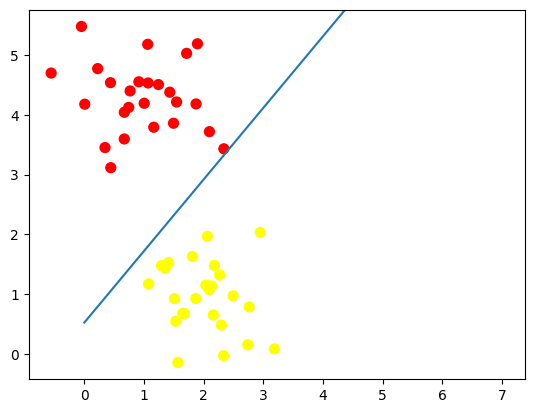

In [10]:
#Implementing the perceptrons
def perceptrons():
    L = 1 #the learning rate
    iterations = 10
    i= np.arange(1, iterations+1) #creates an ndarray with evenly spaced values and returns the reference to it.


    #Setting all the weights to 0
    wP = np.zeros(shape=(1, x_train.shape[1]+1))#remember that in the case of perceptron, the bias counts as a weight (therefore +1)

    #Keeping track of what is missclassified to make sure code is working
    misclassified = []

    #Adjusting the weights of the perceptron
    for i in range (iterations):
        misclassed = 0
        for x_i, label in zip(x_train, y_train):

            x_i = np.insert(x_i, 0, 1) #inserts 1 for the bias
            y_i = np.matmul(wP, x_i)
            target = 1  if (y_i>0) else 0 #the step function that returns a 1 if y_i is greater than 0, otherwise returns a 0

            #Finding if the actual - the predicted equal 0 (if it does equal 0, no updates need to be made to the weight)
            delta = (label-target)
            #The goal is for delta to be zero bc that means that no adjustments need to be made

            if (delta): #the if function, when the inside argument is not 0, assumes that its true
                misclassed += 1
                wP += delta*x_i #subgradient
        misclassified.append(misclassed)

    #print (misclassified)
    return (wP)

wP = perceptrons()

#Printing the accuracy score
from sklearn.metrics import accuracy_score

wP_nobias = wP[0][1:] #w with no bias, which I will use to check accuracy

def sign_func(value): #this step function is the subgradient descent
    return 1 if (value > 0) else 0
vector_step = np.vectorize(sign_func) #So that the step function is applied to every element in the array

#Training set:
y_predpercept = vector_step(np.matmul(x_train, np.transpose(wP_nobias)))
print("Training accuracy: ", accuracy_score(y_train, y_predpercept))

#Training set:
y_predpercept = vector_step(np.matmul(x_test, np.transpose(wP_nobias)))
print("Testing accuracy: ", accuracy_score(y_test, y_predpercept))


#Showing the results on the scatterplot:
def plot_perceptron(ax = None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x_grid = np.linspace(xlim[0], xlim[1], 30)
    y_grid = np.linspace(ylim[0], ylim[1], 30)
    Y_grid, X_grid = np.meshgrid(y_grid, x_grid)
    xy = np.vstack([X_grid.ravel(), Y_grid.ravel()]).T
    x1 = np.linspace(0,7,50)
    x2 = -wP[0,1]*x1/wP[0,2] - wP[0,0]/wP[0,2]
    plt.plot(x1,x2)

    ax.set_ylim(ylim)

plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
plot_perceptron()

Training accuracy:  1.0
Testing accuracy:  1.0


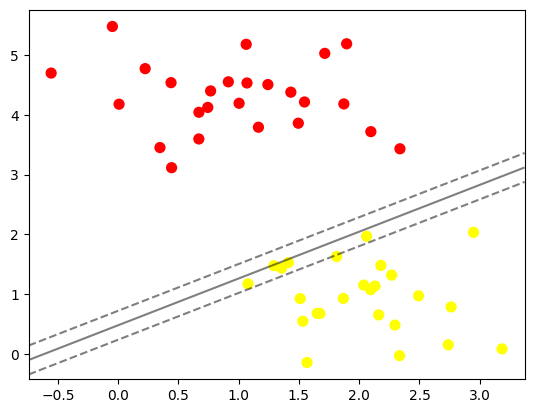

In [7]:
#Comparing the results of the perceptron with the sklearn model:
from sklearn.linear_model import Perceptron
Pmodel = Perceptron(tol=1e-3, random_state=0)
Pmodel.fit(x_train, y_train)

def plot_perceptron_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for the perceptron"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x_grid = np.linspace(xlim[0], xlim[1], 30)
    y_grid = np.linspace(ylim[0], ylim[1], 30)
    Y_grid, X_grid = np.meshgrid(y_grid, x_grid)
    xy = np.vstack([X_grid.ravel(), Y_grid.ravel()]).T
    P = model.decision_function(xy).reshape(X_grid.shape)
    
    # plot decision boundary and margins
    ax.contour(X_grid, Y_grid, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    ax.set_ylim(ylim)

plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
plot_perceptron_decision_function(Pmodel)

print("Training accuracy: ", accuracy_score(y_train, Pmodel.predict(x_train)))
print("Testing accuracy: ", accuracy_score(y_test, Pmodel.predict(x_test)))

## Equations for hinge loss in SVMs
Hinge Loss and penalty for overfitting: 
$ hinge \ loss = max(0, 1-y^m (w^Tx^m + b)) + min_{w,b}(1/2)(||w||^2) $ 

Note that in hinge loss, data is misclassified when its loss is less than 1 (in perceptrons, the misclassification occurs at the zero boundary).

Resources:
- https://towardsdatascience.com/a-definitive-explanation-to-hinge-loss-for-support-vector-machines-ab6d8d3178f1
- https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47
-https://datamonje.com/classification-loss-functions/
-https://www.analyticsvidhya.com/blog/2019/08/detailed-guide-7-loss-functions-machine-learning-python-code/

Training accuracy:  1.0
Testing accuracy:  0.9


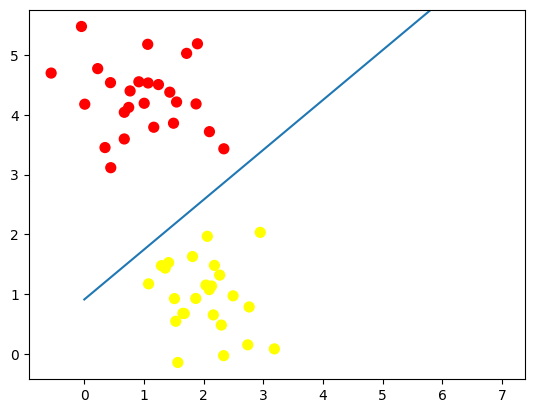

In [91]:
#Hinge Loss Function for SVM
L = 1
iterations = 100

def hinge_loss(y, y_pred):
    return np.maximum(0, 1-y*y_pred)
 
def support_vector_function():
    #Setting all the weights to 0
    wSVM = np.zeros(shape=(1, x_train.shape[1]+1))#remember that in the case of perceptron, the bias counts as a weight (therefore +1)

    #Keeping track of what is missclassified to make sure code is working
    misclassifiedSVM = []

    for i in range (iterations):
        misclassedSVM = 0
        D_wSVM = 0
        for x_i, label1 in zip(x_train, y_train): #This allows to to iterate through both x_train and y_train, so "label" is y_train
            label=label1
            if(label1==0): #changes 0 to -1
                label=-1 
            x_i = np.insert(x_i, 0, 1) #inserts 1 for the bias
            y_i = np.matmul(wSVM, x_i) #in this case, y_i represents the boundary
            if (hinge_loss(label, y_i)): #the if function, when the inside argument is not 0, assumes that its true
                #Adjusting the weight if the distance from the decision boundary is less than 1
                misclassedSVM += 1
                D_wSVM += -(x_i)*(label)
                
        wSVM -= L*(D_wSVM/(len(x_train)))     
        misclassifiedSVM.append(misclassedSVM)
        
    #print (misclassifiedSVM)
    return wSVM
            
wSVM = support_vector_function()

#Printing the accuracy score
from sklearn.metrics import accuracy_score

wSVM_nobias = wSVM[0][1:] #w with no bias, which I will use to check accuracy
def sign_func(value): #this step function is the s                                                                                                                                                            ubgradient descent
    return 1 if (value > 0) else 0
vector_step = np.vectorize(sign_func) #So that the step function is applied to every element in the array

#Training set:
y_predSVM = vector_step(np.matmul(x_train, np.transpose(wSVM_nobias))+wSVM[0][0])
print("Training accuracy: ", accuracy_score(y_train, y_predSVM))

#Training set:
y_predSVM = vector_step(np.matmul(x_test, np.transpose(wSVM_nobias)))
print("Testing accuracy: ", accuracy_score(y_test, y_predSVM))


#Showing the results on the scatterplot:
def plot_SVM(ax = None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x_grid = np.linspace(xlim[0], xlim[1], 30)
    y_grid = np.linspace(ylim[0], ylim[1], 30)
    Y_grid, X_grid = np.meshgrid(y_grid, x_grid)
    xy = np.vstack([X_grid.ravel(), Y_grid.ravel()]).T
    x1 = np.linspace(0,7,50)
    x2 = -wSVM[0,1]*x1/wSVM[0,2] - wSVM[0,0]/wSVM[0,2]
    plt.plot(x1,x2)

    ax.set_ylim(ylim)

plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
plot_SVM()

Training accuracy:  1.0
Testing accuracy:  1.0


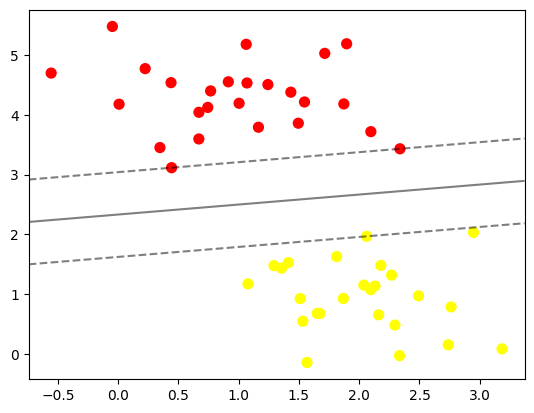

In [35]:
#Comparing with the SVM achieved by sklearn
from sklearn.svm import SVC # "Support vector classifier"
SVMmodel = SVC(kernel='linear', C=1E10)
SVMmodel.fit(x_train, y_train)

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(SVMmodel)

print("Training accuracy: ", accuracy_score(y_train, SVMmodel.predict(x_train)))
print("Testing accuracy: ", accuracy_score(y_test, SVMmodel.predict(x_test)))


#### Comparing the SVM and perceptron
The SVM is noticably more centered that the perceptron that I implement. However, when comparing the self-implemented learning algorithms to the sklearn learning algorithms, both had the same training and testing accuracy yet seem to have different decision boundaries. This may be because the dataset is small and are clearly separable.